In [19]:
import torch
import torchvision
import pandas as pd
from torchvision.transforms import transforms
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [20]:
# load data
train = pd.read_csv("../input/train.csv", dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

In [21]:
# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long
# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

In [22]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [23]:
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

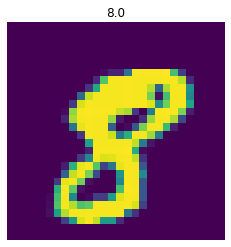

In [24]:
# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.show()

In [25]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [26]:
# Instantiate Model Class
input_dim = 28*28                                      # size of image px*px
output_dim = 10                                        # labels 0,1,2,3,4,5,6,7,8,9
model = LogisticRegressionModel(input_dim, output_dim) # create logistic regression model
error = nn.CrossEntropyLoss()                          # Cross Entropy Loss 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # SGD Optimizer 

In [27]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))  # Define variables
        labels = Variable(labels)
        optimizer.zero_grad()                     # Clear gradients
        outputs = model(train)                    # Forward propagation
        loss = error(outputs, labels)             # Calculate softmax and cross entropy loss
        loss.backward()                           # Calculate gradients
        optimizer.step()                          # Update parameters
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                outputs = model(test)                     # Forward propagation
                predicted = torch.max(outputs.data, 1)[1] # Get predictions from the maximum value
                total += len(labels)                      # Total number of labels
                correct += (predicted == labels).sum()    # Total correct predictions
                
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)                   # store loss 
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.839414119720459  Accuracy: 68.02381134033203%
Iteration: 1000  Loss: 1.6171069145202637  Accuracy: 76.35713958740234%
Iteration: 1500  Loss: 1.2975895404815674  Accuracy: 78.96428680419922%
Iteration: 2000  Loss: 1.1931394338607788  Accuracy: 80.35713958740234%
Iteration: 2500  Loss: 1.036285400390625  Accuracy: 81.10713958740234%
Iteration: 3000  Loss: 0.9314528703689575  Accuracy: 81.88095092773438%
Iteration: 3500  Loss: 0.9089230298995972  Accuracy: 82.52381134033203%
Iteration: 4000  Loss: 0.7552744150161743  Accuracy: 83.01190185546875%
Iteration: 4500  Loss: 0.9685200452804565  Accuracy: 83.42857360839844%
Iteration: 5000  Loss: 0.8064183592796326  Accuracy: 83.80952453613281%
Iteration: 5500  Loss: 0.7468081712722778  Accuracy: 84.01190185546875%
Iteration: 6000  Loss: 0.8735262155532837  Accuracy: 84.32142639160156%
Iteration: 6500  Loss: 0.6687910556793213  Accuracy: 84.55952453613281%
Iteration: 7000  Loss: 0.7169110774993896  Accuracy: 84.82142639160

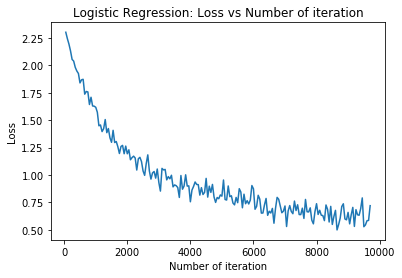

In [28]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()